In [123]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_wine_data = pd.read_csv("Resources/sample_data.csv")
new_common_wine = new_wine_data[["variety", "price", "points", "country", 'description', 'province','region_1', 'region_2','winery']]

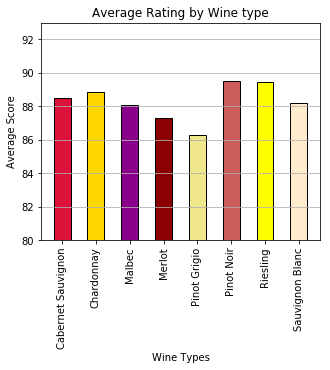

In [124]:
# seperate the values based on wine variety
cabernet_sauvignon_df = new_common_wine.loc[new_common_wine['variety'] =="Cabernet Sauvignon"]
chardonnay_df =new_common_wine.loc[new_common_wine['variety'] == "Chardonnay"] 
malbec_df =new_common_wine.loc[new_common_wine['variety'] == "Malbec"]
merlot_df =new_common_wine.loc[new_common_wine['variety'] == "Merlot"] 
pinot_grigio_df= new_common_wine.loc[new_common_wine['variety'] =="Pinot Grigio"] 
pinot_gris_df= new_common_wine.loc[new_common_wine['variety'] =="Pinot Gris"]
pinot_noir_df= new_common_wine.loc[new_common_wine['variety'] =="Pinot Noir"] 
riesling_df =new_common_wine.loc[new_common_wine['variety'] == "Riesling"]
sauvignon_blanc_df = new_common_wine.loc[new_common_wine['variety'] == "Sauvignon Blanc"]



#average score
cabernet_score=cabernet_sauvignon_df['points'].mean()
chardonnay_score=chardonnay_df['points'].mean()
malbec_score=malbec_df['points'].mean()
merlot_score=merlot_df['points'].mean()
grigio_score=pinot_grigio_df['points'].mean()
noir_score=pinot_noir_df['points'].mean()
riesling_score=riesling_df['points'].mean()
sauvignon_score=sauvignon_blanc_df['points'].mean()
all_wine_scores = [cabernet_score, chardonnay_score, malbec_score, merlot_score, grigio_score, noir_score, riesling_score, sauvignon_score]


#add the names as they are going to appear on bar graph with colors
names= ['Cabernet Sauvignon', 'Chardonnay', 'Malbec','Merlot', 'Pinot Grigio', 'Pinot Noir','Riesling', 'Sauvignon Blanc']
my_colors = ["crimson", "gold", "darkmagenta", "darkred", "khaki", "indianred", "yellow", "blanchedalmond"]

    

plt.bar(names,all_wine_scores, width=.5,color=my_colors,edgecolor="k")
plt.title("Average Rating by Wine type")
plt.xlabel("Wine Types")
plt.ylabel("Average Score")


y=[80,82,84,86,88,90,92,94,96]
plt.yticks(y)
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.ylim((80, 93))
# Save the figure
plt.savefig("Images/Average_Rating_by_Wine_type.png")

# Show plot
plt.show()

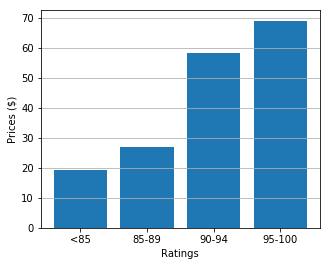

In [125]:

top_wineries=pd.DataFrame(new_common_wine).sort_values(["points"], ascending=False)

#bins
rating = [0,86,90,95,100]
rating_bracket = ['<85','85-89','90-94','95-100']

# Add column of bins based on Age
top_wineries["Rating"]= pd.cut(top_wineries["points"],rating, labels=rating_bracket)

rating_per_group=top_wineries.groupby("Rating")["points"].count()
rating_points=top_wineries.groupby("Rating")["points"].sum()

total_purchase_price=top_wineries.groupby("Rating")["price"].sum()

top_winery_by_rating=pd.DataFrame(rating_per_group, index=rating_bracket)
top_winery_by_rating["Average Purchase Price"]=(total_purchase_price)/top_winery_by_rating["points"]


b=top_winery_by_rating['Average Purchase Price']
plt.bar(rating_bracket,b)
#rating by rating bin
plt.grid(axis='y')
plt.xlabel("Ratings")
plt.ylabel("Prices ($)")

# Save the figure
plt.savefig("Images/Are_Ratings_affected_by_Price.png")

# Show plot
plt.show()

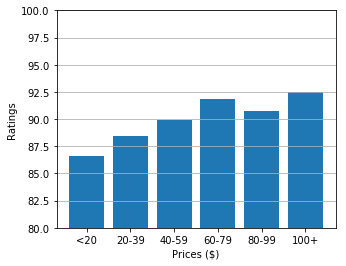

In [126]:
most_expensive_wineries=pd.DataFrame(new_common_wine).sort_values(["price"], ascending=False)
price = [0,19,39,59,79,99,2000]
price_bracket = ['<20','20-39','40-59','60-79','80-99','100+']

# Add column of bins based on Age
top_wineries["Prices"]= pd.cut(top_wineries["price"],price, labels=price_bracket)

prices_per_group=top_wineries.groupby("Prices")["price"].count()
total_prices=top_wineries.groupby("Prices")["price"].sum()

total_purchase_points=top_wineries.groupby("Prices")["points"].sum()

top_winery_by_price=pd.DataFrame(prices_per_group, index=price_bracket)
top_winery_by_price["Average Score"]=(total_purchase_points)/prices_per_group
a=top_winery_by_price['Average Score']

plt.bar(price_bracket,a)
plt.xlabel("Prices ($)")
plt.grid(axis='y')
plt.ylabel("Ratings")
plt.ylim((80, 100))
#rating by price bin

# Save the figure
plt.savefig("Resources/images/Do_Prices_affect_Ratings.png")

# Show plot
plt.show()

In [128]:
unique_winery=all_wines_df.groupby(['winery']).count()
unique_winery

,variety,price,points,country,description,province,region_1,region_2
winery,,,,,,,,
Abbazia di Novacella,1,1,1,1,1,1,1,0
Acacia,1,1,1,1,1,1,1,1
Albert Bichot,1,0,1,1,1,1,1,0
Alois Lageder,1,1,1,1,1,1,1,0
Altocedro,1,1,1,1,1,1,1,0
Alysian,1,1,1,1,1,1,1,1
Amalie Robert,1,1,1,1,1,1,1,1
Ambassador Vineyard,1,1,1,1,1,1,1,1
Anthony Nappa,1,1,1,1,1,1,1,1
